In [1]:
import pandas as pd
import numpy as np

# Some bonds info

In [2]:
bond_info = pd.read_excel('/Users/freezylex/Desktop/курсач/rates/bonds_data_for_word.xlsx', index_col='Unnamed: 0')
bond_info

,coupon_size,redemption_size,issue_date,redemption_date,times_per_year,period,left
SU26203RMFS,6.90,1000,2010-04-08,2016-03-08,2,5.920548,1.019178
SU26206RMFS,7.40,1000,2011-08-06,2017-06-14,2,5.860274,2.287671
SU26204RMFS,7.50,1000,2011-03-23,2018-03-15,2,6.983562,3.038356
SU26208RMFS,7.50,1000,2012-07-03,2019-02-27,2,6.657534,3.994521
SU26216RMFS,6.70,1000,2013-11-13,2019-05-15,2,5.504110,4.205479
SU26210RMFS,6.80,1000,2012-12-19,2019-11-12,2,6.901370,4.701370
SU26214RMFS,6.40,1000,2013-05-06,2020-05-27,2,7.063014,5.241096
SU26205RMFS,7.60,1000,2011-04-13,2021-04-14,2,10.010959,6.123288
SU26217RMFS,7.50,1000,2015-10-28,2021-08-18,2,5.810959,6.468493
SU26209RMFS,7.60,1000,2012-01-08,2022-07-20,2,10.536986,7.389041


# Price dispertion

In [3]:
import json
file = open('/Users/freezylex/Desktop/курсач/bonds_info.json', 'r')
data_bonds = json.load(file)
tickers = list(data_bonds.keys())
df = pd.DataFrame(columns = tickers)
df

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS


In [4]:
from tqdm import tqdm

In [11]:
import os
init_path = '/Users/freezylex/Desktop/курсач/days'
files = os.listdir(init_path)
files.sort()
files = files[1:]

for file in tqdm(files):
    new_path = init_path + '/'+file
    date = file[-12:-4]
    date = pd.to_datetime(date[:4]+'-'+date[4:6]+'-'+date[6:], format='%Y-%m-%d')
    info = pd.read_csv(new_path)
    info.SECCODE = info.SECCODE.apply(lambda x: x[:-1])
    info = info.dropna(axis='rows')
    for code in info['SECCODE'].unique():
        temp_data = info[(info['SECCODE']==code) & (info.BUYSELL == 'B')]
        mean_ = temp_data.TRADEPRICE.mean()
        num = np.sum(((temp_data.TRADEPRICE - mean_) ** 2)*temp_data.VOLUME)
        std = np.sqrt(num / np.sum(temp_data.VOLUME))
        df.loc[date, code] = std


100%|██████████| 244/244 [00:11<00:00, 21.77it/s]


In [12]:
df = df.loc['2015-06-01':].drop(columns=['SU26217RMFS', 'SU26218RMFS'])
df

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
2015-06-01,0.000000,0.040010,0.375000,0.036267,0.186804,0.150000,0.208703,0.018156,0.176731,0.374950,0.115566,0.212193,0.284869
2015-06-02,0.452405,0.592879,0.362700,0.025936,0.110963,0.371606,0.000041,0.135619,0.316848,0.914166,0.317383,0.159189,0.366784
2015-06-03,0.009749,0.194258,0.133803,0.099487,0.103802,0.274715,0.160444,0.183091,0.207096,0.058305,0.271487,0.143395,0.164498
2015-06-04,0.000000,0.158346,NaN,0.052332,0.120994,0.182168,0.193821,0.322236,0.329433,0.212805,0.260000,0.154417,0.287125
2015-06-05,0.125050,0.276171,NaN,0.040399,0.214890,0.000002,0.154326,0.208616,0.249700,0.043107,0.250000,0.130401,0.395243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-22,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-25,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
2015-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2015-05-28,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN


In [13]:
df = df.astype('float')

In [14]:
df.fillna(0, inplace=True)

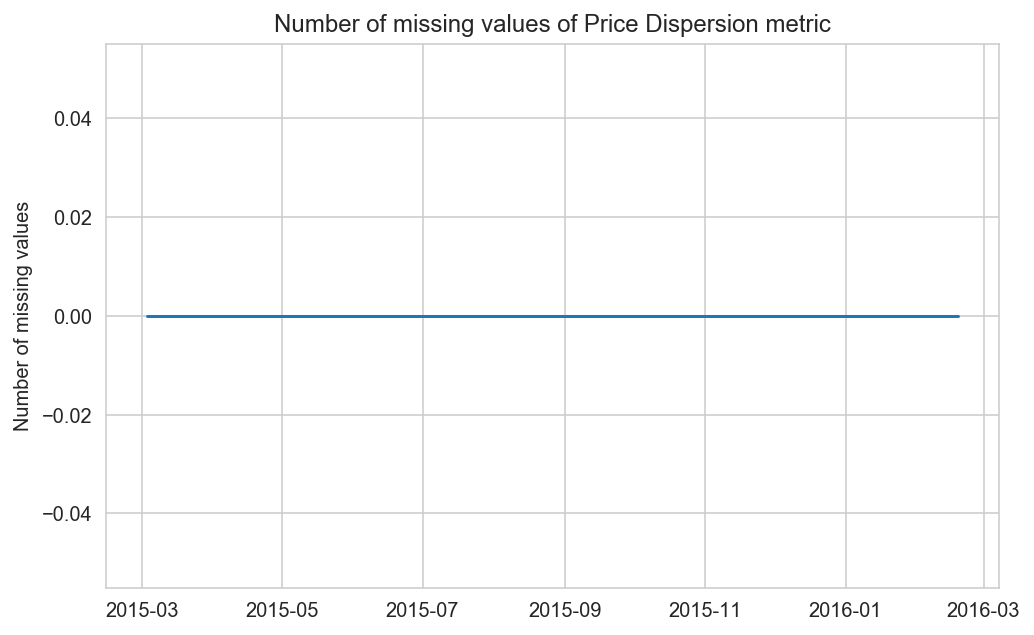

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

missing = df.isna().sum(axis='columns')

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x = missing.index, y=missing.values)
plt.ylabel('Number of missing values')
plt.title('Number of missing values of Price Dispersion metric')
plt.savefig('fine_dispertion.png', dpi=300)

In [7]:
#df.isna().sum(axis='rows').to_excel('number_of_missing_disp.xlsx')
df.isna().sum(axis='rows')

SU26214RMFS    14
SU26215RMFS     0
SU26216RMFS    13
SU26203RMFS     0
SU26204RMFS     0
SU26205RMFS     2
SU26206RMFS     0
SU26207RMFS     0
SU26208RMFS     1
SU26209RMFS    12
SU26210RMFS    16
SU26211RMFS    15
SU26212RMFS     1
dtype: int64

In [139]:
#df = df.astype('float')
mean_price_dp = df.describe()
mean_price_dp.to_excel('price_dispersion_info.xlsx')
mean_price_dp

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
count,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000
mean,0.13899,0.19106,0.12482,0.07797,0.11094,0.16597,0.10189,0.20540,0.13212,0.16080,0.16030,0.16904,0.20857
std,0.12927,0.18153,0.16629,0.06957,0.08977,0.14447,0.11602,0.11732,0.13439,0.15075,0.16271,0.16576,0.11690
min,0.00000,0.00000,0.00000,0.00000,0.00004,0.00000,0.00004,0.01459,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.04999,0.09094,0.03106,0.03563,0.05311,0.08217,0.04173,0.11935,0.04724,0.05958,0.02267,0.01417,0.12122
50%,0.10491,0.14644,0.08325,0.05733,0.09103,0.13561,0.06737,0.18329,0.10122,0.13386,0.12810,0.14330,0.18610
75%,0.20642,0.24701,0.16152,0.09504,0.13909,0.20768,0.11770,0.26951,0.17311,0.22067,0.24982,0.26751,0.26664
max,0.82394,1.84527,1.49676,0.41513,0.59394,0.92515,0.80545,0.65830,0.94150,0.91417,0.80102,1.00173,0.54718


In [140]:
mean_disp_by_bond = df.describe().T[['mean']]

In [141]:
pd.merge(mean_disp_by_bond, bond_info, left_index=True, right_index=True).sort_values('mean')[['mean', 'left']].to_excel('price_disp_with_time_left.xlsx')
pd.merge(mean_disp_by_bond, bond_info, left_index=True, right_index=True).sort_values('mean')[['mean', 'left']]

,mean,left
SU26203RMFS,0.07797,1.01918
SU26206RMFS,0.10189,2.28767
SU26204RMFS,0.11094,3.03836
SU26216RMFS,0.12482,4.20548
SU26208RMFS,0.13212,3.99452
SU26214RMFS,0.13899,5.24110
SU26210RMFS,0.16030,4.70137
SU26209RMFS,0.16080,7.38904
SU26205RMFS,0.16597,6.12329
SU26211RMFS,0.16904,7.90685


In [142]:
df.to_excel('price_dispersion.xlsx')

# ------------------------------------------------------------------

# Trading Share

In [6]:
df = pd.DataFrame(columns = tickers)
df

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS


In [7]:
init_path = '/Users/freezylex/Desktop/курсач/days'
files = os.listdir(init_path)
files.sort()
files = files[1:]

for file in tqdm(files):
    new_path = init_path + '/'+file
    date = file[-12:-4]
    date = pd.to_datetime(date[:4]+'-'+date[4:6]+'-'+date[6:], format='%Y-%m-%d')
    info = pd.read_csv(new_path)
    info.SECCODE = info.SECCODE.apply(lambda x: x[:-1])
    all_volumes = info.groupby('SECCODE').sum()['VOLUME']
    traded = info[(~info['TRADEPRICE'].isna())].groupby('SECCODE').sum()['VOLUME']
    ratio = traded/all_volumes
    ratio.fillna(0, inplace=True)
    df.loc[date, ratio.index.values] = ratio

100%|██████████| 244/244 [00:05<00:00, 46.00it/s]


In [8]:
df = df.loc['2015-06-01':].drop(columns=['SU26217RMFS', 'SU26218RMFS'])
df

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
2015-06-01,0.0299977,0.246532,4.4437e-05,0.207268,0.0126303,0.0194024,0.342055,0.287535,0.00365709,3.33294e-05,0.000199554,0.0555858,5.70588e-05
2015-06-02,0.000135783,0.299015,0.000100996,0.175141,1.38093e-05,0.000212239,0.00520503,0.214501,7.55666e-05,0.000191405,0.00033346,0.0386085,0.00520163
2015-06-03,0.211352,0.397874,0.0100934,0.0815313,0.127138,0.204438,0.000103836,0.292166,0.000158651,0.239957,0.00109698,0.387503,0.208117
2015-06-04,3.64811e-06,0.0636291,0,0.0216369,0.230986,0.328339,0.0687836,0.219399,4.33687e-05,6.54177e-05,0.00102341,0.32539,0.118772
2015-06-05,0.15495,0.11802,0,0.00341085,0.0282251,0.0508249,0.0133363,0.210976,0.00139791,0.0778625,0.01205,0.29376,0.100862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-15,0.189786,0.241208,0.0396359,0.233192,0.00136872,0.00259685,0.148902,0.179431,0.0877561,0.0077929,0.00237844,0.000503803,0.072861
2016-02-16,0.190956,0.157839,0.202314,0.317516,0.10044,0.0539406,0.166644,0.117181,0.0609794,0.00451668,0.113295,0.0603963,0.26266
2016-02-17,0.00172601,0.240564,0.0275998,0.0166493,0.0232349,0.107915,0.170692,0.242045,0.00103763,0.0584314,0.0294222,0.000144177,0.257927
2016-02-18,0.191518,0.165447,0.257345,0.319968,0.0166752,0.280489,0.0113253,0.189065,0.225339,0.0852844,0.000319189,0.00205723,0.203697


#### Сделай что-то с файлом!

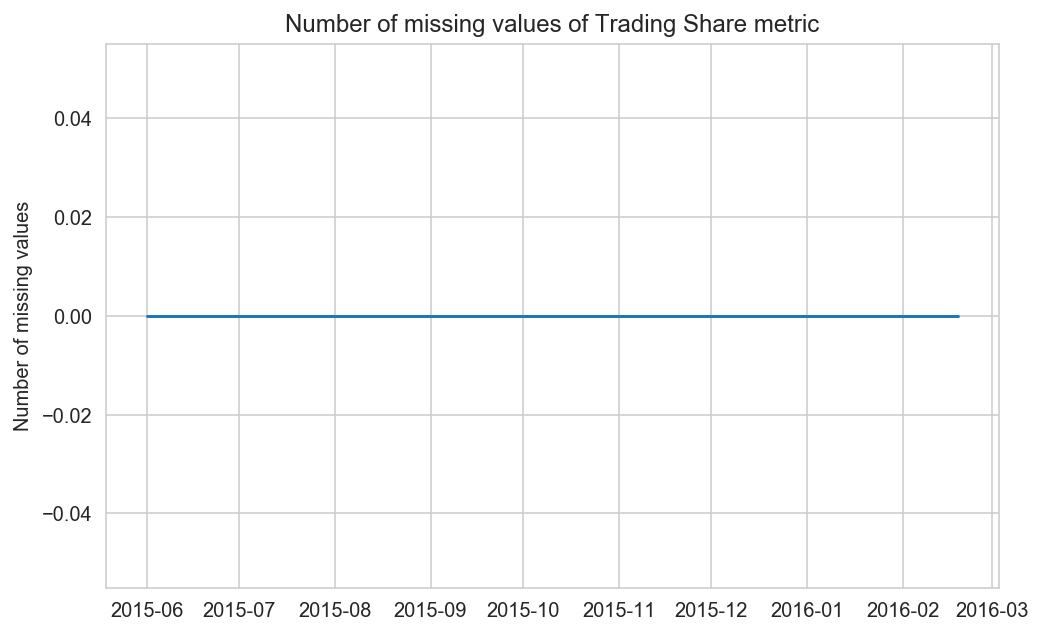

In [50]:
missing = df.isna().sum(axis='columns')

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x = missing.index, y=missing.values)
plt.ylabel('Number of missing values')
plt.title('Number of missing values of Trading Share metric')
plt.savefig('fine_TS.png', dpi=300)

In [84]:
df.isna().sum(axis='rows')

SU26214RMFS    0
SU26215RMFS    0
SU26216RMFS    0
SU26203RMFS    0
SU26204RMFS    0
SU26205RMFS    0
SU26206RMFS    0
SU26207RMFS    0
SU26208RMFS    0
SU26209RMFS    0
SU26210RMFS    0
SU26211RMFS    0
SU26212RMFS    0
dtype: int64

In [11]:
df = df.astype('float')
df.describe().to_excel('trading_share_describe.xlsx')
df.describe()

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,0.133247,0.192353,0.113630,0.178532,0.154925,0.151855,0.147167,0.221154,0.124712,0.108923,0.067074,0.117543,0.194734
std,0.132042,0.118692,0.130156,0.113786,0.127780,0.125588,0.120555,0.092349,0.119275,0.121593,0.100285,0.129642,0.097777
min,0.000000,0.000020,0.000000,0.000082,0.000014,0.000000,0.000052,0.000252,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002799,0.094605,0.000187,0.088903,0.027730,0.044486,0.039551,0.163408,0.009748,0.002673,0.000310,0.000471,0.127360
50%,0.105148,0.194604,0.053097,0.168090,0.134982,0.130135,0.118390,0.234544,0.099644,0.058191,0.010792,0.060940,0.198758
75%,0.240606,0.284151,0.211730,0.263942,0.255981,0.242536,0.213247,0.282844,0.211262,0.202238,0.108794,0.216000,0.263278
max,0.495660,0.472846,0.498912,0.466796,0.457310,0.492406,0.456059,0.423039,0.432856,0.430113,0.471336,0.467362,0.414814


In [10]:
df.to_excel('trading_share_describe.xlsx')

In [18]:
mean_trading = df.describe().T[['mean', 'std', 'max', 'min']]
#pd.merge(mean_trading, bond_info, left_index=True, right_index=True).sort_values('mean')[['mean', 'left']].to_excel('mean_trading_volume_with_left.xlsx')
pd.merge(mean_trading, bond_info, left_index=True, right_index=True).sort_values('min')


,mean,std,max,min,coupon_size,redemption_size,issue_date,redemption_date,times_per_year,period,left
SU26214RMFS,0.133247,0.132042,0.495660,0.000000,6.40,1000,2013-05-06,2020-05-27,2,7.063014,5.241096
SU26216RMFS,0.113630,0.130156,0.498912,0.000000,6.70,1000,2013-11-13,2019-05-15,2,5.504110,4.205479
SU26205RMFS,0.151855,0.125588,0.492406,0.000000,7.60,1000,2011-04-13,2021-04-14,2,10.010959,6.123288
SU26208RMFS,0.124712,0.119275,0.432856,0.000000,7.50,1000,2012-07-03,2019-02-27,2,6.657534,3.994521
SU26209RMFS,0.108923,0.121593,0.430113,0.000000,7.60,1000,2012-01-08,2022-07-20,2,10.536986,7.389041
SU26210RMFS,0.067074,0.100285,0.471336,0.000000,6.80,1000,2012-12-19,2019-11-12,2,6.901370,4.701370
SU26211RMFS,0.117543,0.129642,0.467362,0.000000,7.00,1000,2013-01-16,2023-01-25,2,10.030137,7.906849
SU26212RMFS,0.194734,0.097777,0.414814,0.000000,7.05,1000,2013-01-23,2028-01-19,2,14.997260,12.893151
SU26204RMFS,0.154925,0.127780,0.457310,0.000014,7.50,1000,2011-03-23,2018-03-15,2,6.983562,3.038356
SU26215RMFS,0.192353,0.118692,0.472846,0.000020,7.00,1000,2013-04-09,2023-08-16,2,10.358904,8.463014


In [59]:
# не совсем согласуется с теорией касательно вида КБД

In [62]:
df.to_excel('trading_share.xlsx')

# ----------------------------------------------------------------------

# Trading volume

In [16]:
df = pd.DataFrame(columns = tickers)
df

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS


In [17]:
init_path = '/Users/freezylex/Desktop/курсач/days'
files = os.listdir(init_path)
files.sort()
files = files[1:]

for file in tqdm(files):
    new_path = init_path + '/'+file
    date = file[-12:-4]
    date = pd.to_datetime(date[:4]+'-'+date[4:6]+'-'+date[6:], format='%Y-%m-%d')
    info = pd.read_csv(new_path)
    info.SECCODE = info.SECCODE.apply(lambda x: x[:-1])
    info = info.dropna(axis='rows')
    volumes = info.groupby('SECCODE').sum()['VOLUME']
    df.loc[date, volumes.index.values] = volumes

100%|██████████| 244/244 [00:04<00:00, 60.68it/s]


In [18]:
df = df.loc['2015-06-01':].drop(columns=['SU26217RMFS', 'SU26218RMFS'])
df

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
2015-06-01,8300,180046,4,185306,1780,600,200490,1943404,240,4,6,44554,104
2015-06-02,24,200142,20,66634,8,36,1592,212412,22,46,42,10010,6584
2015-06-03,59848,2.45867e+06,2040,41228,103846,55532,34,1.80068e+06,70,106628,156,1.9228e+06,789400
2015-06-04,4,441128,NaN,15550,265790,1334808,410042,2239636,24,40,1102,1600084,812502
2015-06-05,40028,260088,NaN,708,23620,12002,2994,1956064,1760,202010,3212,1180122,212054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-15,677132,1788056,78916,384460,1424,1706,153110,1341942,113416,4280,1260,648,115150
2016-02-16,571732,1589178,460958,498918,88348,44696,203024,909726,70278,4114,102494,61350,1051938
2016-02-17,2560,1745270,62330,15148,21560,150334,215944,1811786,1230,54748,80602,218,1665016
2016-02-18,445352,417466,914424,1382442,11006,909244,8722,879848,1009182,101316,220,2280,1166054


In [19]:
df = df.astype('float')

In [1]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x = df.sum().index, y = df.sum().values)
plt.xticks(rotation=25)
plt.ylabel('Trading volume for all time sample')
plt.title('Sum of trading volumes measured in units')
plt.yscale('log')
plt.savefig('trading_volume.png', dpi=300)

NameError: name 'plt' is not defined

#### Сделай что-то с файлом!

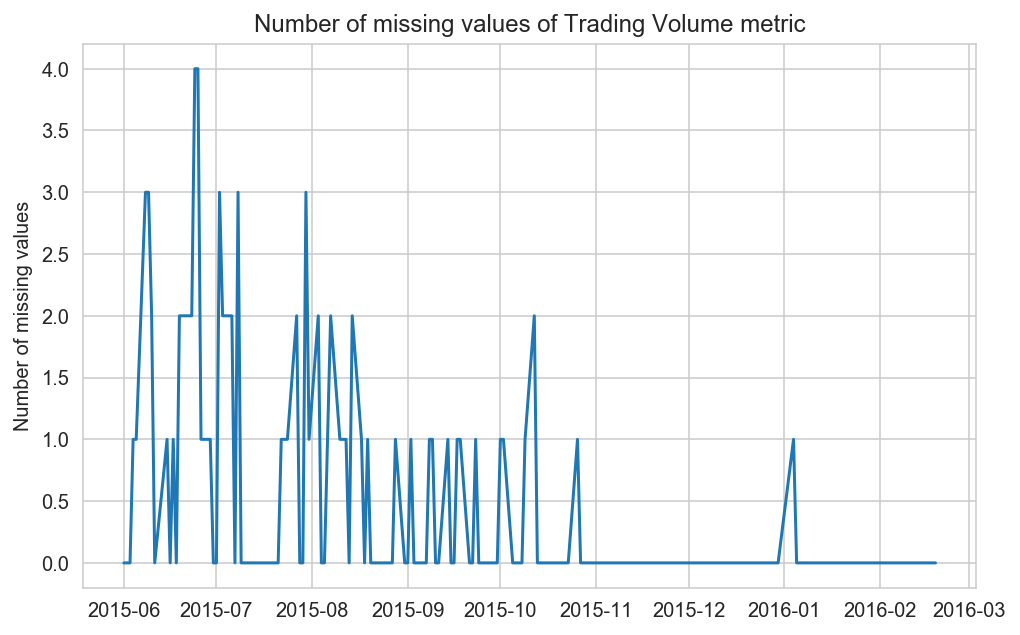

In [106]:
missing = df.isna().sum(axis='columns')

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x = missing.index, y=missing.values)
plt.ylabel('Number of missing values')
plt.title('Number of missing values of Trading Volume metric')
plt.savefig('fine_TV.png', dpi=300)

In [24]:
df.describe() / 10 **5

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
count,0.001700,0.001840,0.001710,0.001840,0.001840,0.001820,0.001840,0.001840,0.001830,0.001720,0.001680,0.001690,0.001830
mean,3.465711,9.796631,4.234166,3.140515,2.904953,2.291685,2.696362,13.964731,2.532754,1.519530,0.875994,3.090152,7.916522
std,7.377975,19.840321,13.857761,6.714137,4.432693,3.575481,4.272296,19.070579,4.756682,2.982956,2.507476,9.664733,8.821883
min,0.000020,0.000120,0.000020,0.000160,0.000080,0.000020,0.000340,0.001400,0.000020,0.000020,0.000020,0.000020,0.001040
25%,0.023865,1.249545,0.001050,0.488625,0.140230,0.163300,0.264475,3.274045,0.038130,0.022320,0.002230,0.006480,1.935170
50%,1.000100,3.407340,0.623300,1.266980,1.044870,0.806180,1.143000,8.287120,0.692300,0.510230,0.071980,0.445540,5.400360
75%,4.106400,9.911320,3.544560,3.442640,4.007345,2.980845,2.774855,16.389190,2.638250,1.601025,0.662645,2.040200,10.172230
max,66.516560,177.647180,156.601220,76.255360,25.106440,19.421060,33.583280,135.229600,43.914500,25.703200,24.742020,77.501780,52.422100


In [39]:
mean_trading = df.describe().T[['mean', 'std', 'max', 'min']]
#pd.merge(mean_trading, bond_info, left_index=True, right_index=True).sort_values('mean')[['mean', 'left']].to_excel('mean_trading_volume_with_left.xlsx')
pd.merge(mean_trading, bond_info, left_index=True, right_index=True).sort_values('std')


,mean,std,max,min,coupon_size,redemption_size,issue_date,redemption_date,times_per_year,period,left
SU26210RMFS,8.759940e+04,2.507476e+05,2474202.0,2.0,6.80,1000,2012-12-19,2019-11-12,2,6.901370,4.701370
SU26209RMFS,1.519530e+05,2.982956e+05,2570320.0,2.0,7.60,1000,2012-01-08,2022-07-20,2,10.536986,7.389041
SU26205RMFS,2.291685e+05,3.575481e+05,1942106.0,2.0,7.60,1000,2011-04-13,2021-04-14,2,10.010959,6.123288
SU26206RMFS,2.696362e+05,4.272296e+05,3358328.0,34.0,7.40,1000,2011-08-06,2017-06-14,2,5.860274,2.287671
SU26204RMFS,2.904953e+05,4.432693e+05,2510644.0,8.0,7.50,1000,2011-03-23,2018-03-15,2,6.983562,3.038356
SU26208RMFS,2.532754e+05,4.756682e+05,4391450.0,2.0,7.50,1000,2012-07-03,2019-02-27,2,6.657534,3.994521
SU26203RMFS,3.140515e+05,6.714137e+05,7625536.0,16.0,6.90,1000,2010-04-08,2016-03-08,2,5.920548,1.019178
SU26214RMFS,3.465711e+05,7.377975e+05,6651656.0,2.0,6.40,1000,2013-05-06,2020-05-27,2,7.063014,5.241096
SU26212RMFS,7.916522e+05,8.821883e+05,5242210.0,104.0,7.05,1000,2013-01-23,2028-01-19,2,14.997260,12.893151
SU26211RMFS,3.090152e+05,9.664733e+05,7750178.0,2.0,7.00,1000,2013-01-16,2023-01-25,2,10.030137,7.906849


In [107]:
df.fillna(0, inplace=True)
df.to_excel('trading_volumne.xlsx')

# Unique roundtrip costs

In [51]:
df = pd.DataFrame(columns = tickers)
df

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS


In [52]:
init_path = '/Users/freezylex/Desktop/курсач/days'
files = os.listdir(init_path)
files.sort()
files = files[1:]

for file in tqdm(files):
    new_path = init_path + '/'+file
    date = file[-12:-4]
    date = pd.to_datetime(date[:4]+'-'+date[4:6]+'-'+date[6:], format='%Y-%m-%d')
    info = pd.read_csv(new_path)
    info.SECCODE = info.SECCODE.apply(lambda x: x[:-1])
    info = info.dropna(axis='rows')
    try:
        ratios = (info.groupby('SECCODE').max()['PRICE'] - info.groupby('SECCODE').min()['PRICE'])/info.groupby('SECCODE').mean()['PRICE']
        df.loc[date, ratios.index.values] = ratios
    except:
        df.loc[date] = np.nan
        

100%|██████████| 244/244 [00:07<00:00, 31.99it/s]


In [53]:
df = df.loc['2015-06-01':].drop(columns=['SU26217RMFS', 'SU26218RMFS'])
df

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
2015-06-01,0.00000,0.00245,0.00858,0.00364,0.01620,0.00343,0.00425,0.01742,0.00555,0.00878,0.00288,0.00670,0.01632
2015-06-02,0.05293,0.04386,0.01140,0.03111,0.00539,0.01084,0.02370,0.02916,0.00816,0.05264,0.02302,1.08222,0.03872
2015-06-03,0.05018,0.01225,1.05834,0.02981,0.00540,0.00857,0.00848,0.03210,0.01103,0.02614,1.04510,0.01335,0.01098
2015-06-04,0.00000,0.01863,NaN,0.04133,0.01088,0.01742,1.04905,0.02314,0.00954,0.00709,0.00603,0.00800,0.01839
2015-06-05,0.00299,0.01187,NaN,0.00135,1.20751,0.00000,0.01062,0.01501,0.00556,0.00593,0.01273,0.00619,0.00862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-15,0.00684,1.01172,0.01169,0.02022,0.00523,0.00712,0.00258,1.02669,0.00121,0.00614,0.01269,0.02435,1.01106
2016-02-16,0.00569,1.01636,0.00410,0.01001,0.00335,1.03333,1.01757,1.07119,1.08877,1.04445,0.01402,1.01021,1.02979
2016-02-17,0.01145,0.04142,0.01307,1.01662,0.00624,0.00687,0.00442,1.04019,0.00625,0.01130,0.02219,1.01390,1.04353
2016-02-18,0.01363,0.03227,1.07726,1.00884,0.00488,0.01153,1.02599,1.00997,0.00218,0.01171,0.00825,0.00986,1.01708


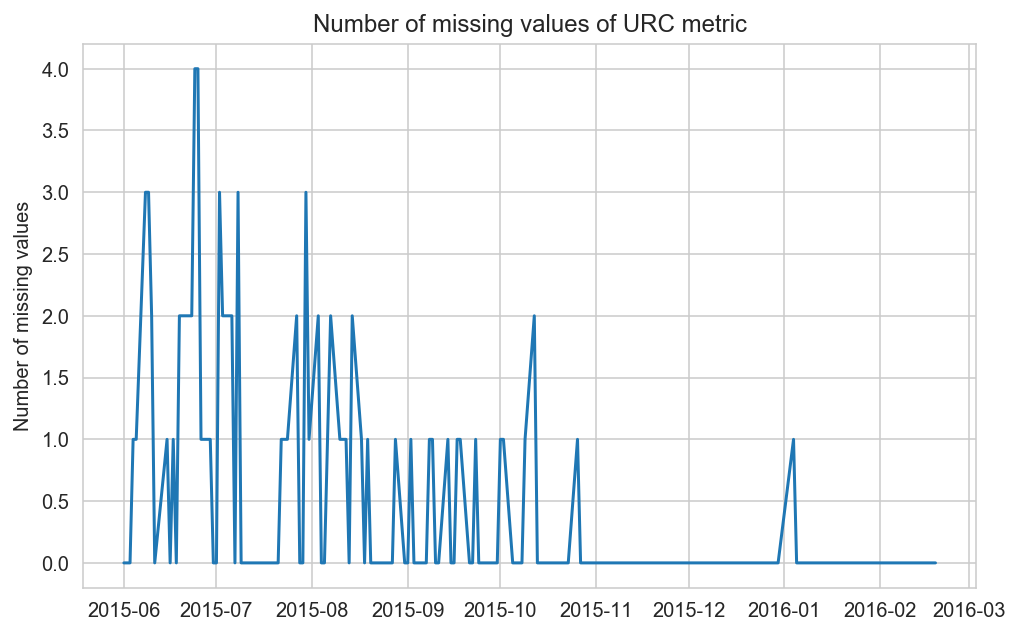

In [114]:
missing = df.isna().sum(axis='columns')

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x = missing.index, y=missing.values)
plt.ylabel('Number of missing values')
plt.title('Number of missing values of URC metric')
plt.savefig('fine_URC.png', dpi=300)

In [54]:
df = df.astype('float')
df.describe()

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
count,170.00000,184.00000,171.00000,184.00000,184.00000,182.00000,184.00000,184.00000,183.00000,172.00000,168.00000,169.00000,183.00000
mean,0.21413,0.26385,0.25572,0.53585,0.50067,0.22230,0.45566,0.77216,0.24176,0.28424,0.21152,0.19235,0.57029
std,0.45506,0.44634,0.46891,0.52613,0.54549,0.42920,0.51910,0.45926,0.46953,0.48829,0.43594,0.43559,0.52265
min,0.00000,0.00000,0.00000,0.00019,0.00000,0.00000,0.00031,0.00436,0.00000,0.00000,0.00000,0.00000,0.00317
25%,0.00486,0.00626,0.00275,0.00331,0.00472,0.00486,0.00513,0.03137,0.00330,0.00575,0.00390,0.00347,0.01427
50%,0.00872,0.01370,0.00765,1.00698,0.03282,0.00967,0.01332,1.02378,0.00633,0.01077,0.00886,0.00872,1.01633
75%,0.02300,0.07140,0.03361,1.03310,1.06735,0.02451,1.03333,1.03980,0.03046,0.06982,0.03008,0.02435,1.03993
max,2.00000,1.24623,1.55776,1.27963,1.43397,1.34104,1.33671,1.40916,2.00000,2.00000,1.76369,2.00000,1.36901


In [55]:
mean_trading = df.describe().T[['mean', 'std', 'max', 'min']]
#pd.merge(mean_trading, bond_info, left_index=True, right_index=True).sort_values('mean')[['mean', 'left']].to_excel('mean_trading_volume_with_left.xlsx')
pd.merge(mean_trading, bond_info, left_index=True, right_index=True).sort_values('std')



,mean,std,max,min,coupon_size,redemption_size,issue_date,redemption_date,times_per_year,period,left
SU26205RMFS,0.22230,0.42920,1.34104,0.00000,7.60000,1000,2011-04-13,2021-04-14,2,10.01096,6.12329
SU26211RMFS,0.19235,0.43559,2.00000,0.00000,7.00000,1000,2013-01-16,2023-01-25,2,10.03014,7.90685
SU26210RMFS,0.21152,0.43594,1.76369,0.00000,6.80000,1000,2012-12-19,2019-11-12,2,6.90137,4.70137
SU26215RMFS,0.26385,0.44634,1.24623,0.00000,7.00000,1000,2013-04-09,2023-08-16,2,10.35890,8.46301
SU26214RMFS,0.21413,0.45506,2.00000,0.00000,6.40000,1000,2013-05-06,2020-05-27,2,7.06301,5.24110
SU26207RMFS,0.77216,0.45926,1.40916,0.00436,8.15000,1000,2012-02-22,2027-03-02,2,15.03288,12.00822
SU26216RMFS,0.25572,0.46891,1.55776,0.00000,6.70000,1000,2013-11-13,2019-05-15,2,5.50411,4.20548
SU26208RMFS,0.24176,0.46953,2.00000,0.00000,7.50000,1000,2012-07-03,2019-02-27,2,6.65753,3.99452
SU26209RMFS,0.28424,0.48829,2.00000,0.00000,7.60000,1000,2012-01-08,2022-07-20,2,10.53699,7.38904
SU26206RMFS,0.45566,0.51910,1.33671,0.00031,7.40000,1000,2011-08-06,2017-06-14,2,5.86027,2.28767


### Сделай что-то с файлом!

In [115]:
df.fillna(0, inplace=True)
df.to_excel('URC.xlsx')

# Market Share

In [56]:
df = pd.DataFrame(columns = tickers)
df

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS


In [57]:
init_path = '/Users/freezylex/Desktop/курсач/days'
files = os.listdir(init_path)
files.sort()
files = files[1:]

for file in tqdm(files):
    new_path = init_path + '/'+file
    date = file[-12:-4]
    date = pd.to_datetime(date[:4]+'-'+date[4:6]+'-'+date[6:], format='%Y-%m-%d')
    info = pd.read_csv(new_path)
    info.SECCODE = info.SECCODE.apply(lambda x: x[:-1])
    bb = info.dropna(axis='rows').groupby('SECCODE').sum()['VOLUME']
    ratios_ms = bb/bb.sum()
    df.loc[date, ratios_ms.index.values] = ratios_ms

100%|██████████| 244/244 [00:04<00:00, 53.51it/s]


In [58]:
df = df.loc['2015-06-01':].drop(columns=['SU26217RMFS', 'SU26218RMFS'])
df

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
2015-06-01,0.00324,0.07020,0.00000,0.07225,0.00069,0.00023,0.07817,0.75771,0.00009,0.00000,0.00000,0.01737,0.00004
2015-06-02,0.00005,0.40224,0.00004,0.13392,0.00002,0.00007,0.00320,0.42690,0.00004,0.00009,0.00008,0.02012,0.01323
2015-06-03,0.00815,0.33493,0.00028,0.00562,0.01415,0.00756,0.00000,0.24529,0.00001,0.01453,0.00002,0.26193,0.10753
2015-06-04,0.00000,0.06195,NaN,0.00218,0.03733,0.18745,0.05758,0.31452,0.00000,0.00001,0.00015,0.22471,0.11410
2015-06-05,0.01028,0.06678,NaN,0.00018,0.00606,0.00308,0.00077,0.50224,0.00045,0.05187,0.00082,0.30301,0.05445
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-15,0.14521,0.38345,0.01692,0.08245,0.00031,0.00037,0.03283,0.28778,0.02432,0.00092,0.00027,0.00014,0.02469
2016-02-16,0.09745,0.27087,0.07857,0.08504,0.01506,0.00762,0.03460,0.15506,0.01198,0.00070,0.01747,0.01046,0.17930
2016-02-17,0.00028,0.19040,0.00680,0.00165,0.00235,0.01640,0.02356,0.19766,0.00013,0.00597,0.00879,0.00002,0.18165
2016-02-18,0.04463,0.04183,0.09164,0.13854,0.00110,0.09112,0.00087,0.08817,0.10113,0.01015,0.00002,0.00023,0.11685


In [59]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
MS = df.fillna(0)
MS = MS.astype('float')
#MS.describe().to_excel('market_share_stat.xlsx')
MS.describe()

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
count,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000,184.00000
mean,0.05759,0.13883,0.05234,0.06264,0.06754,0.04587,0.06277,0.23925,0.04159,0.02837,0.01395,0.04003,0.14205
std,0.09903,0.15220,0.10000,0.08969,0.10580,0.06750,0.09587,0.17835,0.05796,0.04963,0.03340,0.07497,0.11554
min,0.00000,0.00001,0.00000,0.00000,0.00002,0.00000,0.00000,0.00061,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00027,0.03533,0.00002,0.01069,0.00427,0.00327,0.00784,0.11081,0.00138,0.00028,0.00002,0.00007,0.05539
50%,0.01235,0.09178,0.00957,0.03724,0.02718,0.01974,0.02384,0.19005,0.01435,0.00790,0.00079,0.00764,0.11984
75%,0.06615,0.19317,0.06168,0.08270,0.08411,0.05299,0.07162,0.32051,0.06201,0.03032,0.01165,0.04112,0.18432
max,0.79106,0.91139,0.69977,0.83558,0.79579,0.40152,0.54189,0.75825,0.30789,0.26353,0.30201,0.45376,0.57092


In [61]:
MS_mean = MS.describe().T[['mean', 'std', 'max', 'min']]
#pd.merge(MS_mean, bond_info, left_index=True, right_index=True).sort_values('mean')[['mean', 'left']].to_excel('mean_MS_with_left.xlsx')
pd.merge(MS_mean, bond_info, left_index=True, right_index=True).sort_values('std')


,mean,std,max,min,coupon_size,redemption_size,issue_date,redemption_date,times_per_year,period,left
SU26210RMFS,0.01395,0.03340,0.30201,0.00000,6.80000,1000,2012-12-19,2019-11-12,2,6.90137,4.70137
SU26209RMFS,0.02837,0.04963,0.26353,0.00000,7.60000,1000,2012-01-08,2022-07-20,2,10.53699,7.38904
SU26208RMFS,0.04159,0.05796,0.30789,0.00000,7.50000,1000,2012-07-03,2019-02-27,2,6.65753,3.99452
SU26205RMFS,0.04587,0.06750,0.40152,0.00000,7.60000,1000,2011-04-13,2021-04-14,2,10.01096,6.12329
SU26211RMFS,0.04003,0.07497,0.45376,0.00000,7.00000,1000,2013-01-16,2023-01-25,2,10.03014,7.90685
SU26203RMFS,0.06264,0.08969,0.83558,0.00000,6.90000,1000,2010-04-08,2016-03-08,2,5.92055,1.01918
SU26206RMFS,0.06277,0.09587,0.54189,0.00000,7.40000,1000,2011-08-06,2017-06-14,2,5.86027,2.28767
SU26214RMFS,0.05759,0.09903,0.79106,0.00000,6.40000,1000,2013-05-06,2020-05-27,2,7.06301,5.24110
SU26216RMFS,0.05234,0.10000,0.69977,0.00000,6.70000,1000,2013-11-13,2019-05-15,2,5.50411,4.20548
SU26204RMFS,0.06754,0.10580,0.79579,0.00002,7.50000,1000,2011-03-23,2018-03-15,2,6.98356,3.03836


In [16]:
MS.to_excel('MS.xlsx')